# `Introduction`

- Nama: Argon
- Batch: HCK 004

- Objective
Pada laporan ini saya akan mengolah dataset dari sebuah nasabah untuk membuat model classification yang paling akurat untuk memprediksi nasabah yang kredit macet

- OUTPUT
Model klasifikasi yang akurat untuk memprediksi nasabah yang kredit macet

# `Pernyataan Masalah`

Mengidentifikasi klasifikasi nasabah dari historikal pembayaran bulanan mereka berdasarkan fitur yang tersedia di dalam dataset agar terlihat masuk ke kelas mana (defaulters (1) atau non defaulters (1))

# `Perumusan Masalah`
- Akan memilih kategori mana yang paling berkorelasi tinggi dengan klasifikasi default payment next month
- Ada berapa kategori yang dipilih dalam menentukan klasifikasi default payment next month
- Apakah marital status berpengaruh terhadap kategori defaulters
- Apakah pembayaran tagihan tiap bulan berpengaruh terhadap kategori defaulters
- Apakah education level berpengaruh terhadap kategori defaulters

# `SQL Queries`

Membuat queries dataset ml_datasets dari database bernama credit_card_default dengan kebutuhan seperti di bawah ini:

- Kolom yang dipilih untuk dataset census_adult_income hanya limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6 dan default_payment_next_month


## Metode
- SELECT 
- limit_balance, 
- CAST(sex AS INT64) AS sex,
- CAST(education_level AS INT64) AS education_level,
- CAST(marital_status AS INT64) AS marital_status,
- age, 
- pay_0, 
- pay_2, 
- pay_3, 
- pay_4,
- CAST(pay_5 AS Float64) AS pay_5,
- CAST(pay_6 AS Float64) AS pay_6,
- bill_amt_1,
- bill_amt_2,
- bill_amt_3,
- bill_amt_4,
- bill_amt_5,
- bill_amt_6,
- pay_amt_1,
- pay_amt_2,
- pay_amt_3,
- pay_amt_4,
- pay_amt_5,
- pay_amt_6,
- CAST(default_payment_next_month AS INT64) AS default_payment_next_month
- FROM `bigquery-public-data.ml_datasets.credit_card_default` 
- LIMIT 7964

# `Import Libraries`

In [1]:
# Melakukan import library dari link csv yang sudah disiapkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn import svm
import phik
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from feature_engine.outliers import Winsorizer

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import SCORERS

#Save model
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# `Data Loading`

Pada subsection ini saya akan melakukan proses penyiapan data untuk eksplorasi lebih lanjut

In [2]:
missing_values = ["n/a", "na", "--", '? ', ' nan', 'no', ' ?']
data = pd.read_csv('h8dsft_P1M1_argon_riadi.csv',na_values=missing_values)

In [3]:
df = data.copy()
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [4]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [5]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [7]:
# Melakukan deteksi non standard missing value
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [8]:
df.loc[df.duplicated(), :] 

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.loc[df.duplicated(), :] 

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month


# `Exploratory Data Analysis (EDA)`

Pada subsection ini saya akan melakukan explorasi data untuk melihat korelasi dan spacing error pada data

In [11]:
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [12]:
df['limit_balance'].unique()

array([ 80000., 200000.,  20000., 260000., 150000., 300000., 130000.,
       500000., 230000., 460000., 780000., 170000., 320000., 290000.,
       240000., 340000., 360000., 380000., 180000., 100000.,  90000.,
        50000., 160000.,  70000., 280000., 220000.,  30000., 120000.,
        10000., 470000., 310000., 140000.,  60000., 110000., 430000.,
       210000., 490000., 330000., 250000., 400000., 370000., 440000.,
       700000., 530000., 390000., 410000., 270000., 560000.,  40000.,
       680000., 480000., 190000., 350000., 420000., 510000., 800000.,
       450000., 750000., 620000.])

In [13]:
df['sex'].unique()

array([1, 2])

In [14]:
df['education_level'].unique()

array([6, 4, 1, 2, 3, 5, 0])

In [15]:
df['marital_status'].unique()

array([1, 2, 3, 0])

In [16]:
df['age'].unique()

array([54., 49., 22., 33., 32., 45., 58., 39., 48., 34., 47., 46., 30.,
       35., 55., 42., 56., 31., 53., 40., 36., 51., 37., 44., 24., 38.,
       26., 25., 23., 27., 28., 29., 41., 63., 50., 43., 66., 61., 52.,
       62., 69., 21., 65., 57., 64., 67., 60., 59., 68.])

In [17]:
df['pay_0'].unique()

array([ 0.,  2.,  1., -1., -2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [18]:
df['pay_2'].unique()

array([ 0., -1.,  2.,  3., -2.,  4.,  1.,  5.,  6.,  7.])

In [19]:
df['pay_3'].unique()

array([ 0.,  2., -2.,  3., -1.,  4.,  5.,  6.,  7.])

In [20]:
df['pay_4'].unique()

array([ 0., -1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., -2.])

In [21]:
df['pay_5'].unique()

array([ 0.,  2.,  3.,  4.,  5.,  6.,  7., -1., -2.])

In [22]:
df['pay_6'].unique()

array([ 0., -1.,  2.,  3., -2.,  4.,  6.,  7.])

In [23]:
df['bill_amt_1'].unique()

array([61454., 49221., 19568., ...,  4280.,   752.,   -70.])

In [24]:
df['bill_amt_1'].unique()

array([61454., 49221., 19568., ...,  4280.,   752.,   -70.])

In [25]:
df['bill_amt_2'].unique()

array([61808., 49599., 19420., ...,   459.,  7702.,  9540.])

In [26]:
df['bill_amt_3'].unique()

array([62290., 50942., 15535., ..., 16666.,  2377.,  5880.])

In [27]:
df['bill_amt_4'].unique()

array([29296., 50146.,  1434., ...,  3788.,  1614.,  3184.])

In [28]:
df['bill_amt_5'].unique()

array([26210., 50235.,   500., ..., -7220.,  -585.,  -830.])

In [29]:
df['bill_amt_6'].unique()

array([17643., 48984.,     0., ...,  6753.,   414., 12000.])

In [30]:
df['default_payment_next_month'].unique()

array([1, 0])

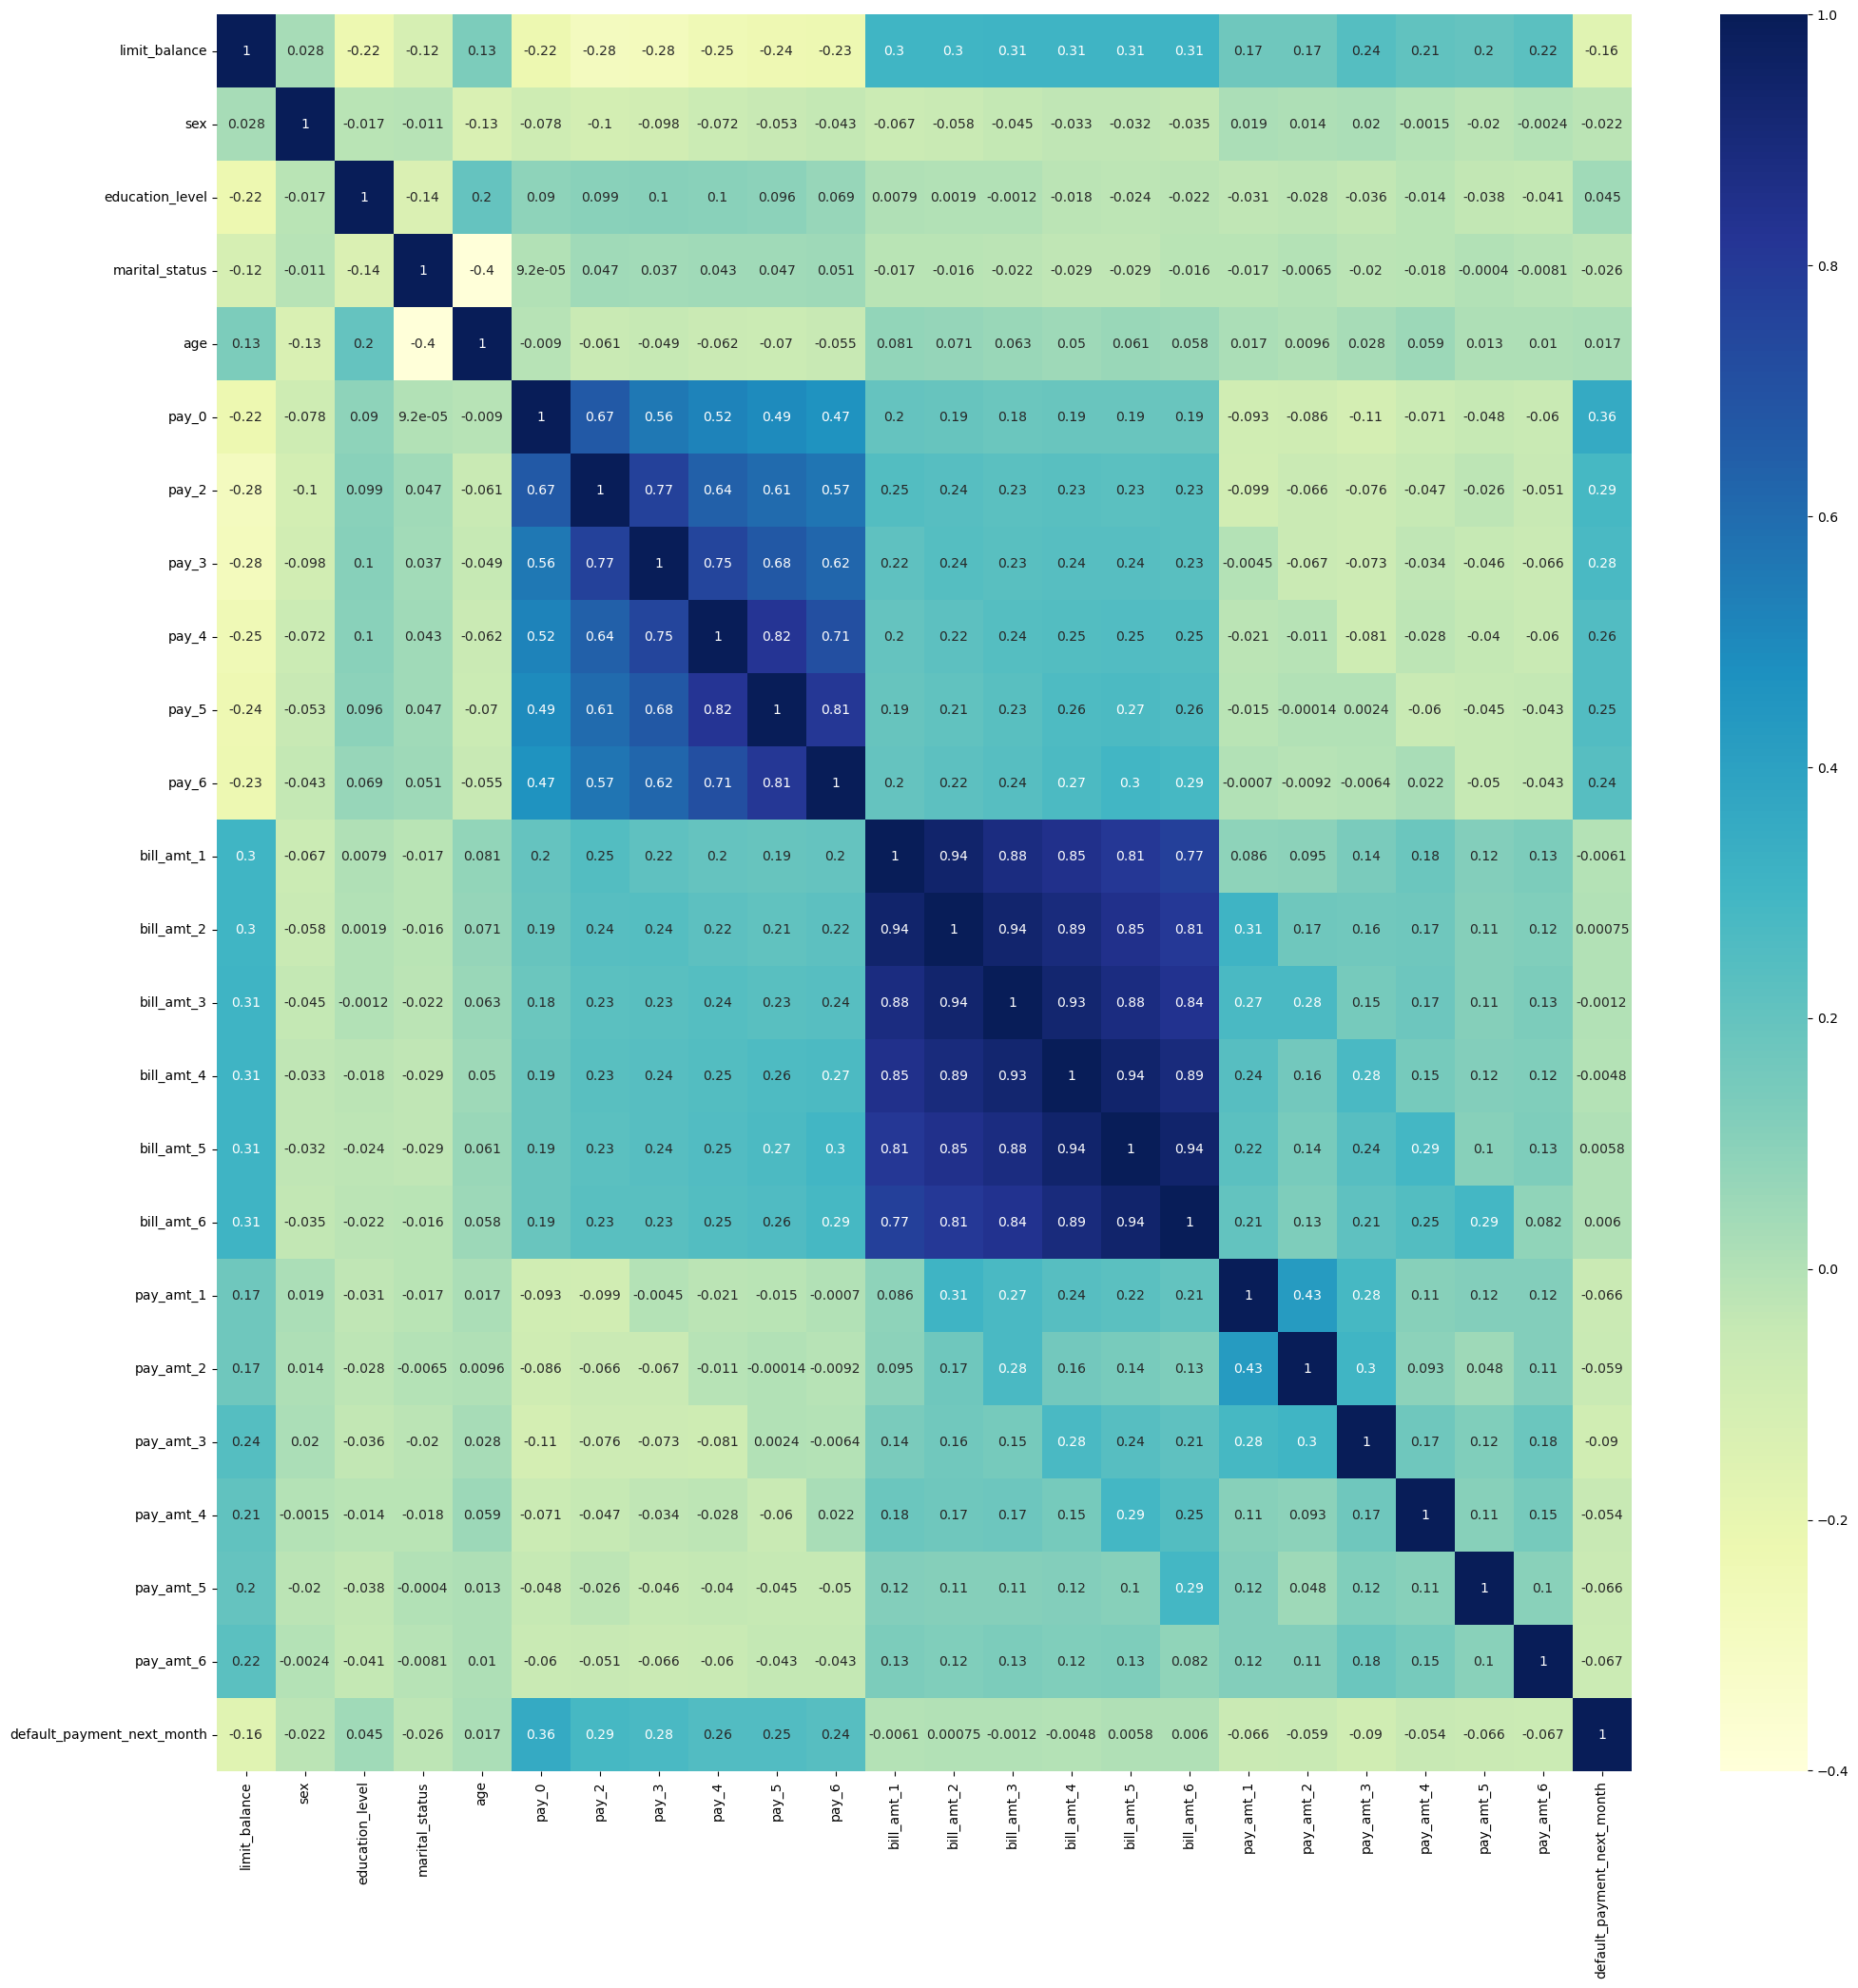

In [31]:
plt.figure(figsize=(24,24))

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [32]:
corr_matrix = df.phik_matrix()
print(corr_matrix)

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']
                            limit_balance       sex  education_level  \
limit_balance                    1.000000  0.114489         0.205667   
sex                              0.114489  1.000000         0.039061   
education_level                  0.205667  0.039061         1.000000   
marital_status                   0.086512  0.000000         0.167096   
age                              0.354603  0.180424         0.246589   
pay_0                            0.268362  0.088779         0.127597   
pay_2                            0.316312  0.122564         0.130980   
pay_3                            0.224128  0.099333         0.136723   
p

In [33]:
df2 = df.copy()

In [34]:
df2.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [35]:
#Feature Selection yang mempunyai korelasi tinggi saja
df2.drop(columns=[
'limit_balance','education_level','sex', 'marital_status', 'age','bill_amt_1',
'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
'pay_amt_6'
], inplace=True)

In [36]:
df2

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...
2960,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


In [37]:
# Menghitung VIF untuk cek Multicollinearity
def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [38]:
multi = df2.iloc[:,[0,1,2,3,4,5,6]]
calc_vif(multi)

,variables,VIF
4,pay_5,4.805178
3,pay_4,4.080401
2,pay_3,3.404084
5,pay_6,3.182684
1,pay_2,3.114981
0,pay_0,1.959232
6,default_payment_next_month,1.117378


# `Data Preprocessing`

Pada subsection ini saya akan melakukan proses penyiapan data untuk eksplorasi lebih lanjut

In [39]:
df2

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...
2960,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


In [40]:
#Memilih kolom
cat_cols= ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

In [41]:
df2

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...
2960,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


In [42]:
#Melihat central tendency (mean, median, modus) dataset untuk kebutuhan analisa
df2.describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,-0.254049,0.214238
std,1.114434,1.180479,1.183337,1.178049,1.158739,1.167061,0.410362
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,1.000000


<AxesSubplot:xlabel='pay_4', ylabel='Count'>

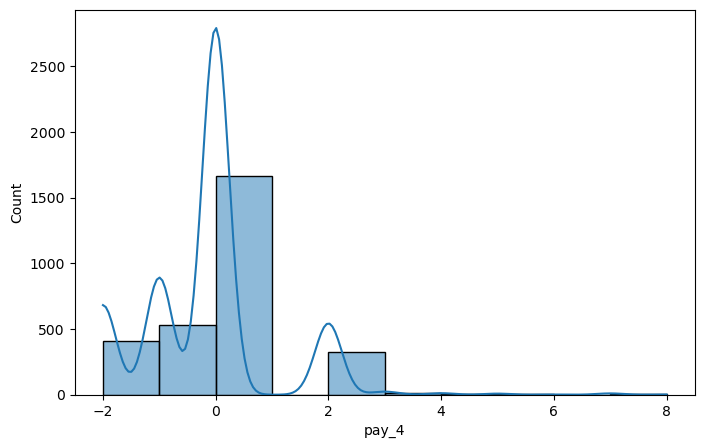

In [43]:
#Visualisasi sebaran data
fig, axes = plt.subplots(figsize=(8,5)) #Width, height in inches
sns.histplot(ax=axes,data=df2['pay_4'],kde=True, bins=10)

In [44]:
#Melihat standar deviasi dataset untuk kebutuhan analisa
df2.apply(lambda x: round(x.skew(), 3))

pay_0                         0.928
pay_2                         0.862
pay_3                         0.932
pay_4                         1.102
pay_5                         1.061
pay_6                         0.979
default_payment_next_month    1.394
dtype: float64

In [45]:
# outlier detection in num cols
Q1 = df2['pay_4'].quantile(.25)
Q3 = df2['pay_4'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df2[(df2['pay_4'] <= lower) | (df2['pay_4'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  1.1470985155195683 %
upper:  3.0
lower:  -4.0


In [46]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['pay_4'])

df3 = wins.fit_transform(df2)
df3

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...
2960,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


In [47]:
#Persentase missing values
missing_percentage = df3.isna().mean() * 100

#Menampilkan kolom dengan nilai missing value yang lebih besar dari 0
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


In [48]:
#Membagi dataset menjadi 2 variabel (fitur & target)
x= df3.drop('default_payment_next_month', axis=1) #fitur
y= df3['default_payment_next_month'] #target

In [49]:
# Split Dataset into Train Data and Test Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)

print('Total Data Train : ', x_train.shape[0])
print('Total Data Test  : ', x_test.shape[0])

Total Data Train :  2074
Total Data Test  :  890


In [50]:
x_train_eda = pd.concat([x_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
x_train_eda.shape

(2074, 7)

In [51]:
x_train_eda.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.0,0.0,0.0,0.0,-1.0,-1.0,0
1,3.0,2.0,2.0,2.0,0.0,0.0,1
2,0.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
3,2.0,2.0,2.0,0.0,0.0,0.0,1
4,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


In [52]:
scaler = MinMaxScaler()

x_train_eda[cat_cols] = scaler.fit_transform(x_train_eda[cat_cols])
x_train_eda

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.2,0.222222,0.222222,0.4,0.111111,0.111111,0
1,0.5,0.444444,0.444444,0.8,0.222222,0.222222,1
2,0.2,0.111111,0.111111,0.0,0.000000,0.000000,0
3,0.4,0.444444,0.444444,0.4,0.222222,0.222222,1
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...
2069,0.3,0.444444,0.444444,0.4,0.222222,0.222222,0
2070,0.4,0.444444,0.444444,0.4,0.222222,0.222222,1
2071,0.4,0.444444,0.222222,0.4,0.222222,0.222222,1
2072,0.2,0.222222,0.222222,0.4,0.222222,0.000000,0


In [53]:
x_train

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
2091,0.0,0.0,0.0,0.0,-1.0,-1.0
1486,3.0,2.0,2.0,2.0,0.0,0.0
2934,0.0,-1.0,-1.0,-2.0,-2.0,-2.0
1416,2.0,2.0,2.0,0.0,0.0,0.0
2680,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...
1365,1.0,2.0,2.0,0.0,0.0,0.0
1356,2.0,2.0,2.0,0.0,0.0,0.0
1031,2.0,2.0,0.0,0.0,0.0,0.0
1669,0.0,0.0,0.0,0.0,0.0,-2.0


In [54]:
cat_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

cat_tr = cat_pipeline.fit_transform(x_train)
cat_tr

array([[0.4, 0.4, 0.4, 0.4, 0.2, 0.2],
       [1. , 0.8, 0.8, 0.8, 0.4, 0.4],
       [0.4, 0.2, 0.2, 0. , 0. , 0. ],
       ...,
       [0.8, 0.8, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0. ],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]])

In [55]:
full_pipeline = ColumnTransformer([
       ("cat_ord", cat_pipeline, ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6'])
    ])

train_tr = full_pipeline.fit_transform(x_train)
train_tr

array([[0.4, 0.4, 0.4, 0.4, 0.2, 0.2],
       [1. , 0.8, 0.8, 0.8, 0.4, 0.4],
       [0.4, 0.2, 0.2, 0. , 0. , 0. ],
       ...,
       [0.8, 0.8, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0. ],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]])

In [56]:
x_train_eda

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.2,0.222222,0.222222,0.4,0.111111,0.111111,0
1,0.5,0.444444,0.444444,0.8,0.222222,0.222222,1
2,0.2,0.111111,0.111111,0.0,0.000000,0.000000,0
3,0.4,0.444444,0.444444,0.4,0.222222,0.222222,1
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...
2069,0.3,0.444444,0.444444,0.4,0.222222,0.222222,0
2070,0.4,0.444444,0.444444,0.4,0.222222,0.222222,1
2071,0.4,0.444444,0.222222,0.4,0.222222,0.222222,1
2072,0.2,0.222222,0.222222,0.4,0.222222,0.000000,0


In [57]:
x_train_eda['default_payment_next_month'].value_counts()

0    1630
1     444
Name: default_payment_next_month, dtype: int64

In [58]:
train_manual = np.array(x_train)

np.allclose(x_train, train_manual)

True

In [59]:
test_tr = full_pipeline.transform(x_test)
test_tr

array([[1. , 1. , 1. , 1. , 1. , 1. ],
       [0.6, 0.8, 1. , 0.8, 0.8, 0.8],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       ...,
       [0.6, 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]])

# `Model Definition, Model Training & Evaluation`

In [60]:
# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining naive bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()

skfold=StratifiedKFold(n_splits=5)

In [61]:
results_log=cross_val_score(log_model,x_train,y_train,cv=skfold,scoring="recall") # macro avg recall 

print('Recall Score - All - Cross Validation  : ', results_log)
print('Recall Score - Mean - Cross Validation : ', results_log.mean())
print('Recall Score - Std - Cross Validation  : ', results_log.std())
print('Recall Score - Range of Test-Set       : ', (results_log.mean()-results_log.std()) , '-', (results_log.mean()+results_log.std()))

Recall Score - All - Cross Validation  :  [0.24719101 0.20224719 0.23595506 0.31460674 0.28409091]
Recall Score - Mean - Cross Validation :  0.25681818181818183
Recall Score - Std - Cross Validation  :  0.03895963232349004
Recall Score - Range of Test-Set       :  0.2178585494946918 - 0.29577781414167187


In [62]:
results_svm=cross_val_score(svm_model,x_train,y_train,cv=skfold,scoring="recall") # macro avg recall 

print('Recall Score - All - Cross Validation  : ', results_svm)
print('Recall Score - Mean - Cross Validation : ', results_svm.mean())
print('Recall Score - Std - Cross Validation  : ', results_svm.std())
print('Recall Score - Range of Test-Set       : ', (results_svm.mean()-results_svm.std()) , '-', (results_svm.mean()+results_svm.std()))

Recall Score - All - Cross Validation  :  [0.37078652 0.41573034 0.38202247 0.38202247 0.40909091]
Recall Score - Mean - Cross Validation :  0.3919305413687436
Recall Score - Std - Cross Validation  :  0.017345419854649533
Recall Score - Range of Test-Set       :  0.37458512151409407 - 0.40927596122339316


In [63]:
results_dt=cross_val_score(dt_model,x_train,y_train,cv=skfold,scoring="recall") # macro avg recall 

print('Recall Score - All - Cross Validation  : ', results_dt)
print('Recall Score - Mean - Cross Validation : ', results_dt.mean())
print('Recall Score - Std - Cross Validation  : ', results_dt.std())
print('Recall Score - Range of Test-Set       : ', (results_dt.mean()-results_dt.std()) , '-', (results_dt.mean()+results_dt.std()))

Recall Score - All - Cross Validation  :  [0.30337079 0.37078652 0.33707865 0.34831461 0.43181818]
Recall Score - Mean - Cross Validation :  0.35827374872318696
Recall Score - Std - Cross Validation  :  0.04272728615776913
Recall Score - Range of Test-Set       :  0.31554646256541785 - 0.40100103488095606


In [64]:
results_rf=cross_val_score(rf_model,x_train,y_train,cv=skfold,scoring="recall") # macro avg recall 

print('Recall Score - All - Cross Validation  : ', results_rf)
print('Recall Score - Mean - Cross Validation : ', results_rf.mean())
print('Recall Score - Std - Cross Validation  : ', results_rf.std())
print('Recall Score - Range of Test-Set       : ', (results_rf.mean()-results_rf.std()) , '-', (results_rf.mean()+results_rf.std()))

Recall Score - All - Cross Validation  :  [0.33707865 0.38202247 0.38202247 0.37078652 0.43181818]
Recall Score - Mean - Cross Validation :  0.3807456588355465
Recall Score - Std - Cross Validation  :  0.030389653270572393
Recall Score - Range of Test-Set       :  0.3503560055649741 - 0.4111353121061189


In [65]:
results_knn=cross_val_score(knn_model,x_train,y_train,cv=skfold,scoring="recall") # macro avg recall 

print('Recall Score - All - Cross Validation  : ', results_knn)
print('Recall Score - Mean - Cross Validation : ', results_knn.mean())
print('Recall Score - Std - Cross Validation  : ', results_knn.std())
print('Recall Score - Range of Test-Set       : ', (results_knn.mean()-results_knn.std()) , '-', (results_knn.mean()+results_knn.std()))

Recall Score - All - Cross Validation  :  [0.31460674 0.4494382  0.34831461 0.42696629 0.47727273]
Recall Score - Mean - Cross Validation :  0.40331971399387123
Recall Score - Std - Cross Validation  :  0.06172629437953958
Recall Score - Range of Test-Set       :  0.34159341961433165 - 0.4650460083734108


In [66]:
results_nb=cross_val_score(nb_model,x_train,y_train,cv=skfold,scoring="recall") # macro avg recall 

print('Recall Score - All - Cross Validation  : ', results_nb)
print('Recall Score - Mean - Cross Validation : ', results_nb.mean())
print('Recall Score - Std - Cross Validation  : ', results_nb.std())
print('Recall Score - Range of Test-Set       : ', (results_nb.mean()-results_nb.std()) , '-', (results_nb.mean()+results_nb.std()))

Recall Score - All - Cross Validation  :  [0.40449438 0.49438202 0.41573034 0.46067416 0.5       ]
Recall Score - Mean - Cross Validation :  0.4550561797752809
Recall Score - Std - Cross Validation  :  0.03924550381252355
Recall Score - Range of Test-Set       :  0.41581067596275734 - 0.49430168358780446


In [67]:
results_ada=cross_val_score(ada_model,x_train,y_train,cv=skfold,scoring="recall") # macro avg recall 

print('Recall Score - All - Cross Validation  : ', results_ada)
print('Recall Score - Mean - Cross Validation : ', results_ada.mean())
print('Recall Score - Std - Cross Validation  : ', results_ada.std())
print('Recall Score - Range of Test-Set       : ', (results_ada.mean()-results_ada.std()) , '-', (results_ada.mean()+results_ada.std()))

Recall Score - All - Cross Validation  :  [0.33707865 0.35955056 0.33707865 0.38202247 0.29545455]
Recall Score - Mean - Cross Validation :  0.3422369765066394
Recall Score - Std - Cross Validation  :  0.02872092744045469
Recall Score - Range of Test-Set       :  0.31351604906618474 - 0.3709579039470941


In [68]:
params = [    { 'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']}
]

log_model = LogisticRegression()

grid_search = GridSearchCV(log_model, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [69]:
grid_search.best_score_

0.28158835546475997

In [70]:
model = grid_search.best_estimator_

model.fit(train_tr, y_train)

model_train = model.predict(train_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1630
           1       0.75      0.27      0.40       444

    accuracy                           0.83      2074
   macro avg       0.79      0.63      0.65      2074
weighted avg       0.81      0.83      0.79      2074

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       699
           1       0.75      0.28      0.40       191

    accuracy                           0.82       890
   macro avg       0.79      0.63      0.65       890
weighted avg       0.81      0.82      0.79       890



In [71]:
# Define the parameter grid to search over
param_grid_svc = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

# Create a GridSearchCV object and fit it to the data
grid_search_svm = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='recall', n_jobs=-1)
grid_search_svm.fit(train_tr, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search_svm.best_params_)


Best hyperparameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}


In [72]:
grid_search_svm.best_score_

0.42579162410623084

In [73]:
model_svm = grid_search_svm.best_estimator_

model_svm.fit(train_tr, y_train)

model_svm_train = model.predict(train_tr)
model_svm_test = model.predict(test_tr)

print(classification_report(y_train, model_svm_train))
print(classification_report(y_test, model_svm_test))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1630
           1       0.75      0.27      0.40       444

    accuracy                           0.83      2074
   macro avg       0.79      0.63      0.65      2074
weighted avg       0.81      0.83      0.79      2074

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       699
           1       0.75      0.28      0.40       191

    accuracy                           0.82       890
   macro avg       0.79      0.63      0.65       890
weighted avg       0.81      0.82      0.79       890



In [74]:
# Define the parameter grid to search over
param_grid_dt = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4],'criterion': ['gini', 'entropy']}


# Create a GridSearchCV object and fit it to the data
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_search_dt.fit(train_tr, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search_dt.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [75]:
grid_search_dt.best_score_

0.3851634320735444

In [76]:
dt_model = grid_search_dt.best_estimator_

dt_model.fit(train_tr, y_train)

model_dt_train = dt_model.predict(train_tr)
model_dt_test = dt_model.predict(test_tr)

print(classification_report(y_train, model_dt_train))
print(classification_report(y_test, model_dt_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1630
           1       0.76      0.41      0.53       444

    accuracy                           0.85      2074
   macro avg       0.81      0.69      0.72      2074
weighted avg       0.84      0.85      0.83      2074

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       699
           1       0.69      0.45      0.54       191

    accuracy                           0.84       890
   macro avg       0.78      0.70      0.72       890
weighted avg       0.83      0.84      0.82       890



In [77]:
# Define the parameter grid to search over
param_grid_rf = {'n_estimators': [100, 200, 300, 400], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4]}

# Create a GridSearchCV object and fit it to the data
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='recall', n_jobs=-1)
grid_search_rf.fit(train_tr, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search_rf.best_params_)

Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}


In [78]:
grid_search_rf.best_score_

0.40102145045965265

In [79]:
rf_model = grid_search_rf.best_estimator_

rf_model.fit(train_tr, y_train)

model_rf_train = rf_model.predict(train_tr)
model_rf_test = rf_model.predict(test_tr)

print(classification_report(y_train, model_rf_train))
print(classification_report(y_test, model_rf_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1630
           1       0.75      0.44      0.55       444

    accuracy                           0.85      2074
   macro avg       0.81      0.70      0.73      2074
weighted avg       0.84      0.85      0.83      2074

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       699
           1       0.70      0.46      0.55       191

    accuracy                           0.84       890
   macro avg       0.78      0.70      0.73       890
weighted avg       0.83      0.84      0.83       890



In [80]:
# Define the parameter grid to search over
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create a GridSearchCV object and fit it to the data
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn.fit(train_tr, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search_knn.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best hyperparameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [81]:
grid_search_knn.best_score_

0.40331971399387123

In [82]:
knn_model = grid_search_knn.best_estimator_

knn_model.fit(train_tr, y_train)

model_rf_train = knn_model.predict(train_tr)
model_rf_test = knn_model.predict(test_tr)

print(classification_report(y_train, model_rf_train))
print(classification_report(y_test, model_rf_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1630
           1       0.62      0.46      0.53       444

    accuracy                           0.83      2074
   macro avg       0.74      0.69      0.71      2074
weighted avg       0.81      0.83      0.82      2074

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       699
           1       0.62      0.48      0.54       191

    accuracy                           0.82       890
   macro avg       0.74      0.70      0.72       890
weighted avg       0.81      0.82      0.82       890



In [83]:
# Define the parameter grid to search over
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create a GridSearchCV object and fit it to the data
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='recall', n_jobs=-1)
grid_search_nb.fit(train_tr, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search_nb.best_params_)

Best hyperparameters:  {'var_smoothing': 1e-09}


In [84]:
grid_search_nb.best_score_

0.4550561797752809

In [85]:
nb_model = grid_search_nb.best_estimator_

nb_model.fit(train_tr, y_train)

model_nb_train = nb_model.predict(train_tr)
model_nb_test = nb_model.predict(test_tr)

print(classification_report(y_train, model_nb_train))
print(classification_report(y_test, model_nb_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1630
           1       0.58      0.45      0.51       444

    accuracy                           0.81      2074
   macro avg       0.72      0.68      0.70      2074
weighted avg       0.80      0.81      0.81      2074

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       699
           1       0.58      0.43      0.50       191

    accuracy                           0.81       890
   macro avg       0.72      0.67      0.69       890
weighted avg       0.80      0.81      0.80       890



In [86]:
# Define the parameter grid to search over
param_grid_ada = {'n_estimators': [50, 100, 150, 200],
              'learning_rate': [0.1, 0.5, 1.0, 2.0]}

# Create a GridSearchCV object and fit it to the data
grid_search_ada = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5, scoring='recall', n_jobs=-1)
grid_search_ada.fit(train_tr, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search_ada.best_params_)

Best hyperparameters:  {'learning_rate': 2.0, 'n_estimators': 50}


In [87]:
grid_search_ada.best_score_

0.47502553626149124

In [88]:
ada_model = grid_search_ada.best_estimator_

ada_model.fit(train_tr, y_train)

model_ada_train = ada_model.predict(train_tr)
model_ada_test = ada_model.predict(test_tr)

print(classification_report(y_train, model_ada_train))
print(classification_report(y_test, model_ada_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1630
           1       0.21      1.00      0.35       444

    accuracy                           0.21      2074
   macro avg       0.11      0.50      0.18      2074
weighted avg       0.05      0.21      0.08      2074

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       699
           1       0.21      1.00      0.35       191

    accuracy                           0.21       890
   macro avg       0.11      0.50      0.18       890
weighted avg       0.05      0.21      0.08       890



In [89]:
full_pipeline

ColumnTransformer(transformers=[('cat_ord',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
                                  'pay_6'])])

In [90]:
all_process = Pipeline([
        ("preprocessing", full_pipeline),
        ("classification", nb_model)
])

all_process.fit(x_train, y_train)
hasil = all_process.predict(x_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       699
           1       0.58      0.43      0.50       191

    accuracy                           0.81       890
   macro avg       0.72      0.67      0.69       890
weighted avg       0.80      0.81      0.80       890



# `Model Saving`

In [91]:
joblib.dump(all_process, open('default_pred.pkl', 'wb'))

# `Conceptual Problems`

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

## Jawaban

1. Criterion pada Decision Tree adalah metrik yang digunakan untuk mengevaluasi kualitas split pada setiap node. Pemilihan criterion yang tepat sangat berpengaruh dalam tingkat keakuratan Decision Tree Model, saya memakai criterion 'Gini' dan 'Entropi dalam model kasus kali ini

2. Pruning dalam Tree based model adalah suatu teknik pemangkasan node yang bertujuan untuk mencegah overfitting, jenis pruning yang saya tahu ada 2:
-pre pruning = teknik pemangkasan yang dilakukan saat pembuatan model
-post pruning = teknik pemangkasan yang dilakukan saat setelah model selesai dibuat


3. Salah satu cara untuk mendapatkan K yang optimal dalam KNN adalah dengan menggunakan metode grid search, yaitu kita memilih beberapa nilai K secara acak kemudian dievaluasi secara data.

4. Cross Validation merupakan suaatu teknik yang digunakan untuk mengevaluasi suatu model agar tidak terjadi overfitting model

5. - Accuracy merupakan metrik yang menilai seberapa banyak prediksi yang benar dibuat oleh model dibandingkan dengan total prediksi yang dilakukan, metrik accuracy digunakan apabila sebaran data seimbang

- Precision adalah metrik yang digunakan untuk mengukur keakuratan model dalam memprediksi label positif, score precision akan semakin baik apabila angka false positif semakin turun, metrik ini biasa digunakan untuk memprediksi klasifikasi hal yang umum seperti data SES suatu penduduk

- Recall adalah metrik yang digunakan untuk mengukur keakuratan model dalam memprediksi label negatif, score recall akan semakin baik apabila angka false negative semakin turun, metrik ini biasa digunakan untuk memprediksi klasifikasi hal yang bersifat medis seperti prediksi penyakit kanker

- F1 score adalah metrik penggabungan antara precision & recall. F1 score dipakai abaila angka precision & recall belum menunjukan keakuratan yang diinginkan

# `Pengambilan Kesimpulan`

- Dari laporan ini terlihat bahwa model yang paling stabil dalam memprediksi klasifikasi defaulters adalah dengan menggunakan Gaussian nb, model adaboost bisa mendapatkan score yang lebih tinggi dibanding Gaussian nb namun angka score cenderung berubah - ubah sehingga saya memutuskan untuk emmakai  model second best.

- Untuk improvement performa model selanjutnya, variable data yang diberikan diharapkan lebih banyak lagi agar semakin telihat fitur yang bisa mengelompokkan para defaulters dengan lebih akurat